In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

UNCLASSIFIED = False
NOISE = -1

In [2]:
#計算距離的副程式
def _dist(p,q):
    dst = np.sqrt((p[0]-q[0])**2 + (p[1]-q[1])**2)
    return dst

In [3]:
#判斷q是否位於p之eps內
def _eps_neighborhood(p,q,eps):
    
    if _dist(p,q) <= eps:
        return True
    else:
        return False

In [4]:
#將距離小於eps之隸屬於p的q點其在80個裡面之位置記錄成list
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []

    seeds = [index for index in range(n_points) if _eps_neighborhood(point_id,[m[0,index],m[1,index]],eps)]
    return seeds
    

In [5]:
#每次呼叫這個副程式，都會完成一個cluster的建置
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    #near_core是初始核心點旁邊第一圈eps內之點
    near_core = _region_query(m, point_id, eps) 
    print(near_core)
   # print(type(near_core))
    if len(near_core) >= min_points:
        for j in near_core:#這個near_core的會一直變多，所以等於是變相的遞迴
            #core_near_core是核心點周遭一圈內的核心點
            core_near_core = _region_query(m,[m[0,j],m[1,j]],eps)
            if len(core_near_core) >= min_points:
                #把沒有在near_core的點加入
                for k in range(len(core_near_core)):
                    if core_near_core[k] not in near_core:
                        near_core.append(core_near_core[k])#near core會越來越長
        #很酷的寫法，可以用跳躍的方式完成對新建之cluster內的點的狀態之改變做更新
        for j in near_core:
            classifications[j] = cluster_id
        print(near_core)
        #找完一個cluster的點後，id+1
        cluster_id += 1
    return classifications,cluster_id

In [6]:

#主程式
def dbscan(m, eps, min_points):
    """
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    #這邊的迴圈是用來分群的，FALSE為未分群
    for n in range (n_points):
        if classifications[n] == False:
            point_id = [m[0,n],m[1,n]] 
            classifications,cluster_id = _expand_cluster(m,classifications,point_id,cluster_id,eps,min_points)
    #沒有群的點為noise
    for n in range(len(classifications)):
        if classifications[n] == False: 
            classifications[n] = NOISE
    return classifications

In [7]:
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()
#for i in range(80):
    #p=[]
    #p.append(m[0,i])
    #p.append(m[1,i])
    #print(p)
#type([m[0,2],m[1,2]])

In [8]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

[0, 2, 11, 33, 43, 59]
[0, 2, 11, 33, 43, 59, 9, 12, 6, 8, 13, 24, 36, 44, 60, 62, 63, 66, 75, 79, 4, 71, 3, 47, 20, 72, 74]
[1, 23, 31, 37, 41, 45, 48, 54, 55, 73, 76]
[1, 23, 31, 37, 41, 45, 48, 54, 55, 73, 76, 26, 27, 28, 29, 57, 10, 17, 32, 46, 64, 7, 25, 34, 78, 42, 5, 30, 61]
[14, 18, 19, 56, 77]
[14, 18, 19, 56, 77, 15, 52, 53, 70, 38, 39, 16, 49, 21, 65, 22, 50, 58, 51, 67, 35, 68, 40, 69]


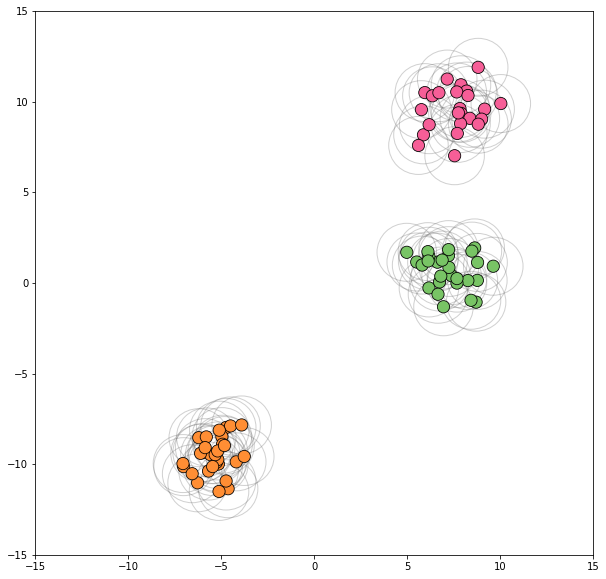

In [9]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [10]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [11]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

[0, 10, 17, 22, 29, 43, 46, 86, 111, 123, 145, 150, 157, 162, 178, 210, 219, 220, 229, 230]
[0, 10, 17, 22, 29, 43, 46, 86, 111, 123, 145, 150, 157, 162, 178, 210, 219, 220, 229, 230, 4, 18, 23, 24, 26, 42, 51, 57, 95, 98, 107, 109, 122, 125, 132, 138, 147, 187, 204, 205, 231, 239, 243, 261, 276, 277, 289, 254, 31, 182, 194, 267, 291, 33, 215, 235, 286, 121, 37, 56, 214, 208, 1, 47, 54, 68, 93, 100, 103, 105, 112, 113, 146, 190, 200, 221, 275, 283, 32, 188, 271, 73, 87, 236, 258, 191, 278, 25, 128, 281, 293, 16, 192, 195]
[2, 3, 5, 6, 9, 28, 38, 41, 50, 52, 67, 69, 71, 72, 78, 81, 83, 84, 85, 89, 91, 94, 102, 106, 114, 116, 117, 120, 124, 126, 127, 129, 130, 136, 137, 139, 140, 144, 148, 149, 152, 153, 154, 156, 158, 159, 160, 161, 164, 165, 166, 167, 169, 173, 175, 177, 183, 184, 186, 189, 193, 197, 201, 203, 216, 224, 225, 226, 228, 232, 233, 238, 240, 241, 242, 244, 247, 248, 250, 253, 255, 256, 263, 266, 274, 279, 280, 282, 290, 292, 295, 296]
[2, 3, 5, 6, 9, 28, 38, 41, 50, 52, 67

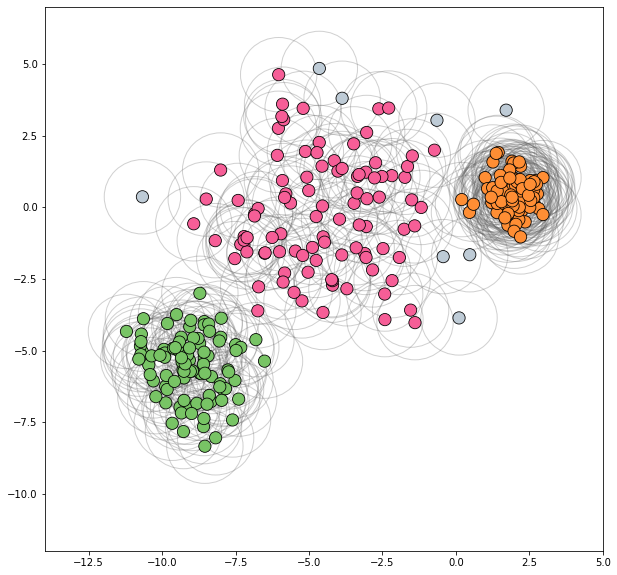

In [12]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)

In [13]:
random.seed(777)
scat_X = np.array(list(random.randint(-1000, 1000) for _ in range(1000)))
scat_Y = np.array(list(random.randint(-1000, 1000) for _ in range(1000)))
# You might need to do some reshape and stack here...

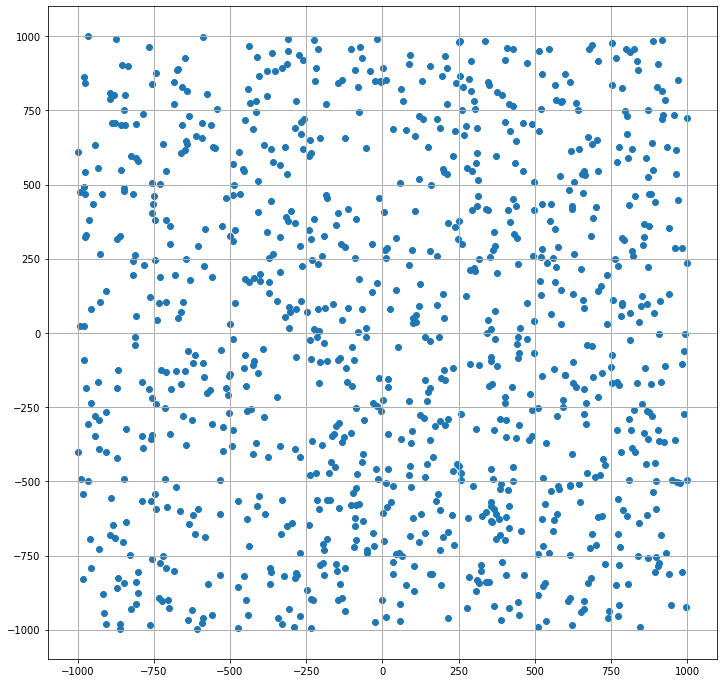

In [14]:
%matplotlib inline
plt.figure(figsize = (12, 12))
plt.grid(linewidth=1)
plt.scatter(scat_X,scat_Y,c="tab:blue")    # Put the "X" and "Y" in the scatter plot function...
# How to make the ＂格線＂ of X and Y the same length...? Google might help!

In [15]:
for i in range(len(scat_X)):
    print(scat_X[i],scat_Y[i])

-531 -814
-87 -697
-88 -521
-246 72
178 722
-448 -180
702 -716
-312 -649
101 -624
540 235
-919 467
889 -537
-88 -579
868 99
368 74
274 125
120 517
-203 -99
231 -464
-409 409
795 748
-753 434
903 905
-767 965
417 770
-841 -638
818 275
-318 55
-788 -164
754 835
515 682
911 107
868 -612
-998 608
713 -477
317 -844
181 -544
-308 378
-412 930
196 866
-453 -819
-781 229
291 916
364 -491
783 58
-571 -846
-361 944
26 79
-743 -592
667 -235
661 -929
683 -825
-151 365
201 -126
644 621
-931 -390
-288 -827
248 316
-698 301
180 94
77 -850
-844 699
119 90
119 730
355 -80
-437 967
779 -721
587 144
413 414
16 286
-807 -840
122 -276
-78 -577
-656 699
-978 493
-101 -180
-475 -856
-554 625
351 836
155 -186
-216 -15
-819 469
-229 -899
-636 -61
661 -189
948 -917
-17 168
526 -488
-870 -423
98 -331
-194 -775
815 -327
148 -229
906 -775
-345 -217
-373 170
-616 -75
-807 591
-647 925
-747 379
135 720
707 -217
192 -848
-931 -729
-988 -492
999 -496
-35 299
201 543
807 591
-458 552
325 -782
-454 -119
692 387
-979 861

In [16]:
def radius(ndarray, r):
    boolean_mask = []
    x=[]
    y=[]
    for i in range(len(ndarray[0])):
        if _dist([ndarray[0][i],ndarray[1][i]],[0,0])<=r:
                x.append(ndarray[0][i])
                y.append(ndarray[1][i])
    x=np.array(x)
    y=np.array(y)
    boolean_mask=np.vstack((x,y))
    
    # Check if a point is in the given radius
    
    return boolean_mask

In [17]:
scat_X_Y=np.vstack((scat_X,scat_Y))
#print(scat_X_Y[0][0],scat_X_Y[1][0])

scat_X_Y = radius(scat_X_Y, 1000)
scat_X=scat_X_Y[0]
scat_Y=scat_X_Y[1]
#print(len(scat_X))

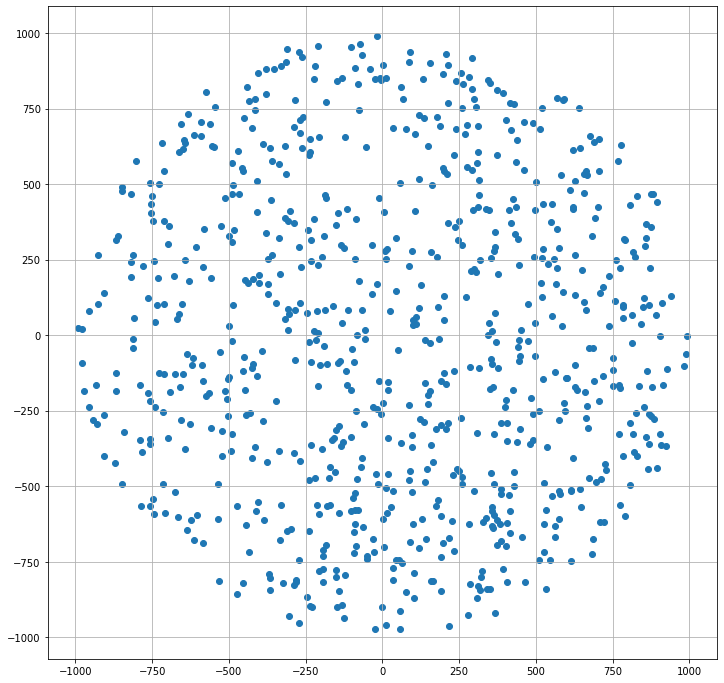

In [18]:
%matplotlib inline
plt.figure(figsize = (12, 12))
plt.grid()
plt.scatter(scat_X,scat_Y,c="tab:blue")    # Put the "X" and "Y" in the scatter plot function...
# How to make the ＂格線＂ of X and Y the same length...? Google might help!

In [19]:
# Calculates the distance between each point...
def dst_sq(scat_X,scat_Y,k):
    dist_sq=[]
    for i in range(len(scat_X)):
        dist_sq.append(_dist([scat_X[k],scat_Y[k]],[scat_X[i],scat_Y[i]]))
    return dist_sq



In [20]:
#這邊原本會噴一個什麼notebook的IOPUB數據出問題的錯誤，
#我跑去爬文後，去改jupyter_notebook_config.py裡面的iopub_data_rate_limit之後，就可以順利運行了
dist_sq=[]

for k in range(len(scat_X)):
    dist_sq.append(dst_sq(scat_X,scat_Y,k))
dist_sq=np.array(dist_sq)
dist_sq=(dist_sq)**2
dist_sq=dist_sq.astype(int)
print(dist_sq)

[[      0  210825  282098 ... 3074906 3018280 3020445]
 [ 210825       0   30977 ... 2217113 2390869 1796418]
 [ 282098   30977       0 ... 1739087 1878129 1471157]
 ...
 [3074906 2217113 1739087 ...       0   90634  462437]
 [3018280 2390869 1878129 ...   90634       0  936504]
 [3020445 1796418 1471157 ...  462437  936504       0]]


In [21]:
# Find the nearest neighbor of each point...
nearest = np.argsort(dist_sq,axis=1)


In [22]:
print(nearest)

[[  0  55  29 ... 599 278 614]
 [  1 639 252 ... 505 609 253]
 [  2 676 261 ...  31 609 253]
 ...
 [787 738 643 ...  55 740 618]
 [788 373 557 ... 546 134 535]
 [789 295  19 ... 523 194 629]]


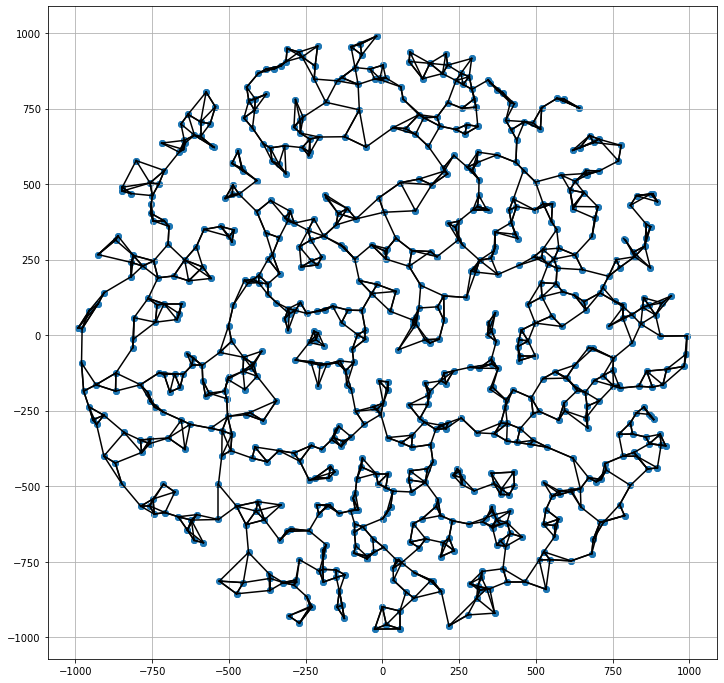

In [23]:
plt.figure(figsize = (12, 12))
plt.grid()
scat=[]
for i in range(len(scat_X)):
    temp=[]
    temp.append(scat_X[i])
    temp.append(scat_Y[i])
    scat.append(temp)

#print(scat)
for i in range(len(scat)-1):
    
    plt.scatter([scat[i][0],scat[i+1][0]],[scat[i][1],scat[i+1][1]],c="tab:blue")
    for j in range(1,4):
        plt.plot([scat[i][0],scat[nearest[i][j]][0]],[scat[i][1],scat[nearest[i][j]][1]],c="k")


        

#print(scat)
#plt.scatter(scat_X,scat_Y)    # Put the "X" and "Y" in the scatter plot function...

# draw lines from each point to its three nearest neighbors
#K = 3
# You might need loops to generate the plot below...

# How to make the ＂格線＂ of X and Y the same length...? Google might help!